In [1]:
import numpy as np
import pandas as pd

In [85]:
import plotly.express as px
import pandas as pd

pop_df = pd.read_excel("C:\\Users\\malon\\Desktop\\5120\\Onboarding\\data\\epic1_population.xlsx", sheet_name="Table 1", header=7)
pop_df = pop_df[["SA3 code", "SA3 name", 'no.',
       'no..1', 'no..2', 'no..3', 'no..4', 'no..5', 'no..6', 'no..7', 'no..8',
       'no..9', 'no..10', 'no..11', 'no..12', 'no..13', 'no..14', 'no..15',
       'no..16', 'no..17', 'no..18', 'no..19', 'no..20']]
pop_df = pop_df.iloc[1:]
pop_df.columns = ["SA3_code", "SA3_name", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", 
                  "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
pop_df = pop_df[pop_df["SA3_name"] == "Melbourne City"]
pop_df.head(5)

,SA3_code,SA3_name,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
770,20604.0,Melbourne City,9529.0,10022.0,10611.0,11224.0,11924.0,12737.0,13509.0,14133.0,...,15605.0,16719.0,17843.0,18983.0,20242.0,20669.0,20869.0,21088.0,20943.0,17198.0
771,20604.0,Melbourne City,154.0,926.0,1913.0,3089.0,3779.0,4152.0,4592.0,5040.0,...,6802.0,7988.0,9170.0,10444.0,11832.0,13923.0,15439.0,16375.0,16678.0,15942.0
772,20604.0,Melbourne City,3731.0,3859.0,4243.0,4460.0,4495.0,4555.0,4806.0,5055.0,...,5280.0,5333.0,5374.0,5411.0,5475.0,5495.0,5409.0,5413.0,5378.0,4962.0
773,20604.0,Melbourne City,37.0,42.0,46.0,50.0,56.0,63.0,68.0,73.0,...,87.0,88.0,89.0,90.0,91.0,88.0,86.0,83.0,81.0,78.0
774,20604.0,Melbourne City,7686.0,8007.0,8155.0,8605.0,8830.0,9013.0,9481.0,9828.0,...,10487.0,10762.0,11030.0,11291.0,11530.0,11535.0,11485.0,11600.0,11402.0,10874.0


In [90]:
# Group and sum population
total_pop = pop_df.groupby(["SA3_code", "SA3_name"]).sum(numeric_only=True).reset_index()

# Reshape to long format
total_pop = total_pop.melt(
    id_vars=["SA3_code", "SA3_name"],
    var_name="Year",
    value_name="Population"
)

# Convert Year to integer
total_pop["Year"] = total_pop["Year"].astype(str)
total_pop["Population"] = total_pop["Population"].astype(int)
total_pop = total_pop[['Year', 'Population']]
total_pop

,Year,Population
0,2001,55399
1,2002,60592
2,2003,66149
3,2004,71532
4,2005,76197
5,2006,80154
6,2007,85141
7,2008,89792
8,2009,94330
9,2010,97578


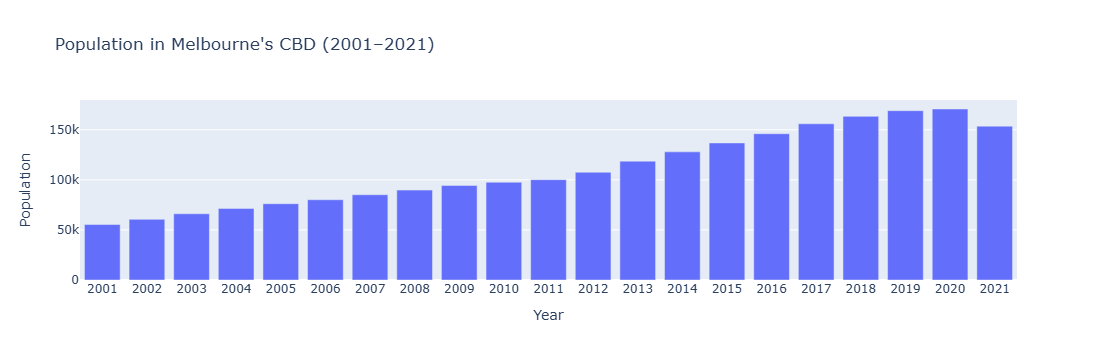

'https://chart-studio.plotly.com/~Ho0212/15/'

In [109]:
import plotly.express as px
import chart_studio.plotly as py
import chart_studio.tools as tls
import pandas as pd

# Set credentials
tls.set_credentials_file(username='Ho0212', api_key='m21iXMpY9ZjIZ0yy4RjF')


# Create figure
fig = px.bar(
    total_pop,
    x="Year",
    y="Population",
    title="Population in Melbourne's CBD (2001–2021)",
    hover_data={"Year": True, "Population": True}
)

# Show locally (optional)
fig.show()

# Upload to Chart Studio
py.plot(fig, filename="melbourne_cbd_population", auto_open=True)


In [102]:
fig.data

(Bar({
     'hovertemplate': 'Year=%{x}<br>Population=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'textposition': 'auto',
     'x': array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
                 '2019', '2020', '2021'], dtype=object),
     'xaxis': 'x',
     'y': array([ 55399,  60592,  66149,  71532,  76197,  80154,  85141,  89792,  94330,
                  97578, 100228, 107573, 118707, 127975, 136873, 146099, 155992, 163449,
                 169106, 170785, 153655]),
     'yaxis': 'y'
 }),)

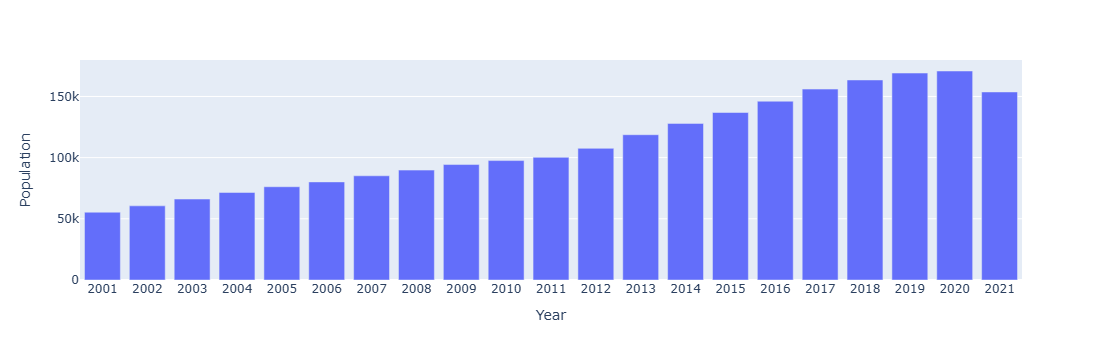

In [104]:
fig = px.bar(total_pop, x="Year", y="Population")
fig.show()